# World Happiness Report 

In [208]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [209]:
sns.set_style('darkgrid')
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=(10,7)
plt.rcParams['figure.facecolor']='#ffe2e7'

In [210]:
data=pd.read_csv('World Happiness Report 2022.csv')

In [195]:
#Showing first 5 rows in data set
data.head()

,RANK,Country,Regional indicator,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,Western Europe,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,Western Europe,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,Western Europe,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,Western Europe,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,Western Europe,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        143 non-null    int64  
 1   Country                                     143 non-null    object 
 2   Regional indicator                          143 non-null    object 
 3   Happiness score                             143 non-null    float64
 4   Whisker-high                                143 non-null    float64
 5   Whisker-low                                 143 non-null    float64
 6   Dystopia (1.83) + residual                  143 non-null    float64
 7   Explained by: GDP per capita                143 non-null    float64
 8   Explained by: Social support                143 non-null    float64
 9   Explained by: Healthy life expectancy       143 non-null    float64
 10  Explained by: 

In [211]:
#to select columns for our interest

data_columns =['Country','Regional indicator','Happiness score','Explained by: GDP per capita','Explained by: Social support','Explained by: Healthy life expectancy','Explained by: Freedom to make life choices','Explained by: Generosity','Explained by: Perceptions of corruption']

In [212]:
data =data[data_columns].copy()

In [213]:
data.head()

,Country,Regional indicator,Happiness score,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,Western Europe,7.821,1.892,1.258,0.775,0.736,0.109,0.534
1,Denmark,Western Europe,7.636,1.953,1.243,0.777,0.719,0.188,0.532
2,Iceland,Western Europe,7.557,1.936,1.320,0.803,0.718,0.270,0.191
3,Switzerland,Western Europe,7.512,2.026,1.226,0.822,0.677,0.147,0.461
4,Netherlands,Western Europe,7.415,1.945,1.206,0.787,0.651,0.271,0.419


In [214]:
# to check null value

data.isnull().sum()

Country                                       0
Regional indicator                            0
Happiness score                               0
Explained by: GDP per capita                  0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
dtype: int64

In [215]:
#renaming column name 

data =data.rename ({'Regional indicator':'Regional_indicator','Happiness score' :'Happiness_score' , 'Explained by: GDP per capita':'GDP_per_capita','Explained by: Social support':'Social_support','Explained by: Healthy life expectancy':'Healthy_life_expectancy','Explained by: Freedom to make life choices':'Freedom_to_make_life_choices','Explained by: Generosity':'Generosity','Explained by: Perceptions of corruption':'Absence_of_corruption'},axis=1)

In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       143 non-null    object 
 1   Regional_indicator            143 non-null    object 
 2   Happiness_score               143 non-null    float64
 3   GDP_per_capita                143 non-null    float64
 4   Social_support                143 non-null    float64
 5   Healthy_life_expectancy       143 non-null    float64
 6   Freedom_to_make_life_choices  143 non-null    float64
 7   Generosity                    143 non-null    float64
 8   Absence_of_corruption         143 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.2+ KB


<BarContainer object of 10 artists>

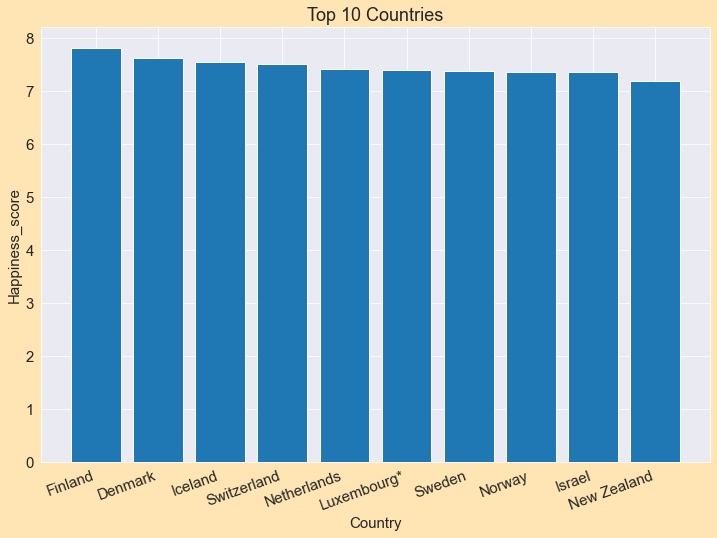

In [217]:
#top 10 happy countries 

top_10 =data.head(10)
plt.rcParams['figure.figsize']=(12,8)
plt.title('Top 10 Countries')
plt.xlabel('Country',fontsize =15)
plt.ylabel('Happiness_score', fontsize =15)
plt.xticks(rotation=20 , ha='right')
plt.bar(top_10.Country, top_10.Happiness_score)


<BarContainer object of 10 artists>

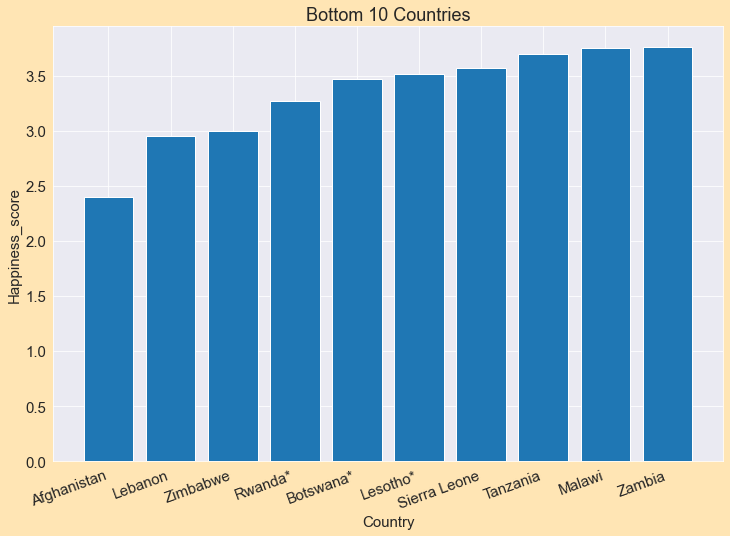

In [160]:
#Bottom 10  countries 
bottom_10 =data.sort_values(by='Happiness_score').head(10)
 
plt.rcParams['figure.figsize']=(12,8)
plt.title('Bottom 10 Countries')
plt.xlabel('Country',fontsize =15)
plt.ylabel('Happiness_score', fontsize =15)
plt.xticks(rotation=20 , ha='right')
plt.bar(bottom_10.Country, bottom_10.Happiness_score)

Text(0, 0.5, 'GDP per capita')

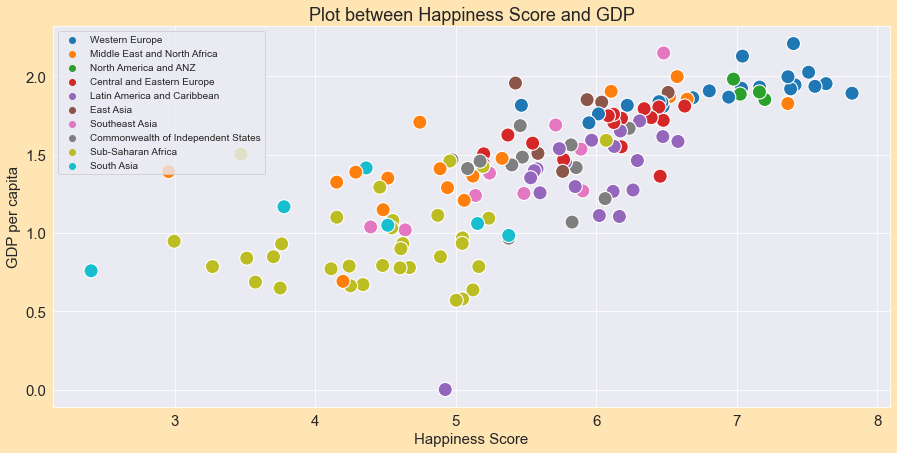

In [109]:
# plot between happiness and GDP

plt.rcParams['figure.figsize']=(15,7)
plt.title('Plot between Happiness Score and GDP')
sns.scatterplot(x=data.Happiness_score,y=data.GDP_per_capita ,hue=data.Regional_indicator ,s=200);
plt.legend(loc='upper left',fontsize='10')
plt.xlabel('Happiness Score')
plt.ylabel('GDP per capita')

In [110]:
gdp_region =data.groupby('Regional_indicator')['GDP_per_capita'].sum()

In [111]:
gdp_region

Regional_indicator
Central and Eastern Europe            26.327
Commonwealth of Independent States    16.840
East Asia                             10.441
Latin America and Caribbean           25.626
Middle East and North Africa          25.198
North America and ANZ                  7.620
South Asia                             6.433
Southeast Asia                        12.571
Sub-Saharan Africa                    30.758
Western Europe                        40.072
Name: GDP_per_capita, dtype: float64

Text(0, 0.5, '')

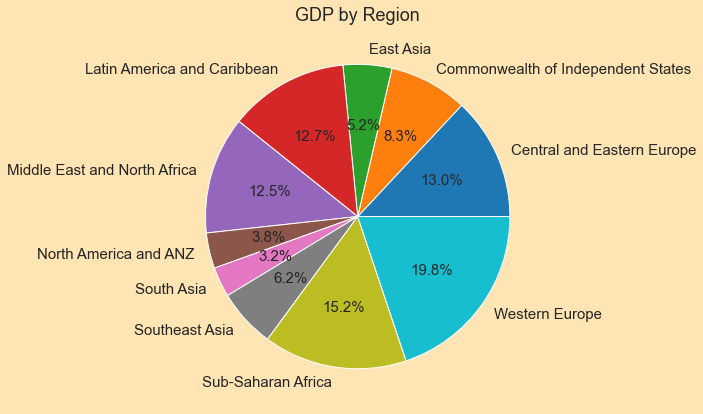

In [112]:
gdp_region.plot.pie(autopct='%1.1f%%')
plt.title('GDP by Region')
plt.ylabel('')

In [113]:
#total countries 

total_country =data.groupby('Regional_indicator')[['Country']].count()

In [114]:
total_country

,Country
Regional_indicator,
Central and Eastern Europe,16
Commonwealth of Independent States,12
East Asia,6
Latin America and Caribbean,19
Middle East and North Africa,17
North America and ANZ,4
South Asia,6
Southeast Asia,9
Sub-Saharan Africa,33


<AxesSubplot:>

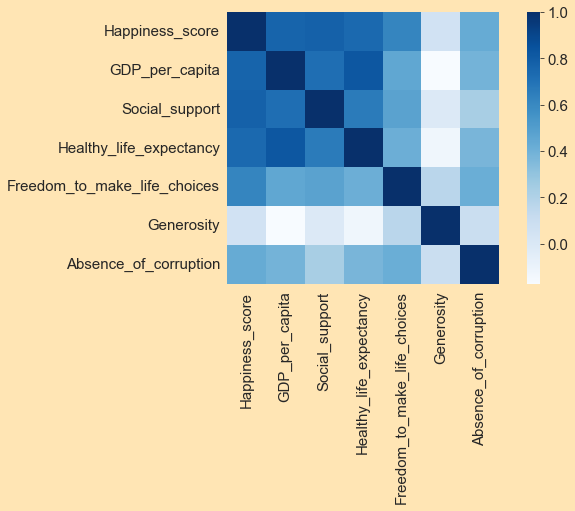

In [115]:
#correlation map 

cor =data.corr(method='pearson')
f,ax =plt.subplots(figsize=(10,5))
sns.heatmap(cor,mask=np.zeros_like(cor,dtype=bool),cmap='Blues',square=True,ax=ax)

In [116]:
#corruption in region

corruption =data.groupby('Regional_indicator')[['Absence_of_corruption']].mean()

In [117]:
corruption

,Absence_of_corruption
Regional_indicator,
Central and Eastern Europe,0.071000
Commonwealth of Independent States,0.160333
East Asia,0.191000
Latin America and Caribbean,0.108947
Middle East and North Africa,0.135706
North America and ANZ,0.342250
South Asia,0.106000
Southeast Asia,0.164333
Sub-Saharan Africa,0.120667


<BarContainer object of 10 artists>

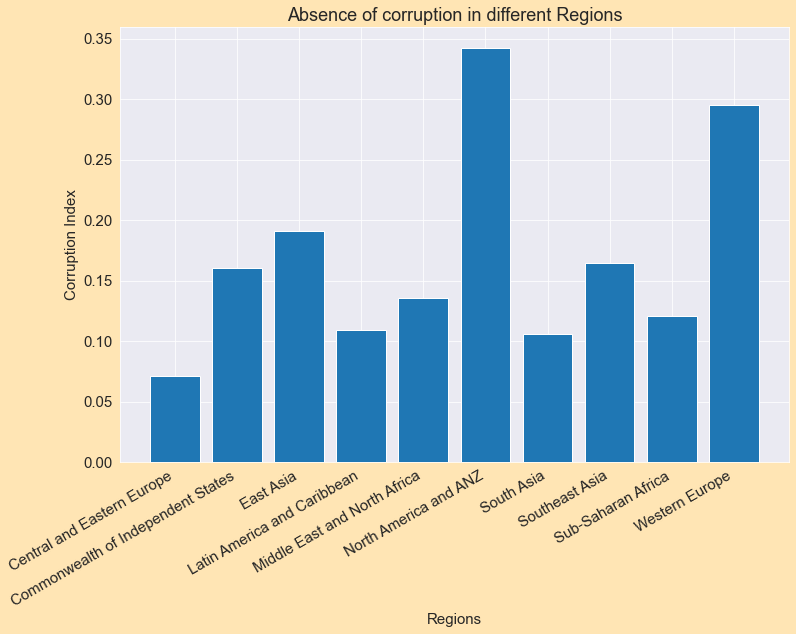

In [119]:
plt.rcParams['figure.figsize']=(12,8)
plt.title('Absence of corruption in different Regions')
plt.xlabel('Regions',fontsize =15)
plt.ylabel('Corruption Index', fontsize =15)
plt.xticks(rotation=30 , ha='right')
plt.bar(corruption.index, corruption.Absence_of_corruption)

In [120]:
#life expectancy of top10 and bottom 10 countries

top_10 =data.head(10)
bottom_10=data.tail(10)


In [121]:
bottom_10

,Country,Regional_indicator,Happiness_score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Absence_of_corruption
133,Zambia,Sub-Saharan Africa,3.760,0.930,0.577,0.306,0.525,0.203,0.083
134,Malawi,Sub-Saharan Africa,3.750,0.648,0.279,0.388,0.477,0.140,0.157
135,Tanzania,Sub-Saharan Africa,3.702,0.848,0.597,0.425,0.578,0.248,0.270
136,Sierra Leone,Sub-Saharan Africa,3.574,0.686,0.416,0.273,0.387,0.202,0.055
137,Lesotho*,Sub-Saharan Africa,3.512,0.839,0.848,0.000,0.419,0.076,0.018
138,Botswana*,Sub-Saharan Africa,3.471,1.503,0.815,0.280,0.571,0.012,0.102
139,Rwanda*,Sub-Saharan Africa,3.268,0.785,0.133,0.462,0.621,0.187,0.544
140,Zimbabwe,Sub-Saharan Africa,2.995,0.947,0.690,0.270,0.329,0.106,0.105
141,Lebanon,Middle East and North Africa,2.955,1.392,0.498,0.631,0.103,0.082,0.034
142,Afghanistan,South Asia,2.404,0.758,0.000,0.289,0.000,0.089,0.005


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       143 non-null    object 
 1   Regional_indicator            143 non-null    object 
 2   Happiness_score               143 non-null    float64
 3   GDP_per_capita                143 non-null    float64
 4   Social_support                143 non-null    float64
 5   Healthy_life_expectancy       143 non-null    float64
 6   Freedom_to_make_life_choices  143 non-null    float64
 7   Generosity                    143 non-null    float64
 8   Absence_of_corruption         143 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.2+ KB


C:\Users\devan\AppData\Local\Temp/ipykernel_29136/3808533575.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels,rotation=45,ha='right')
C:\Users\devan\AppData\Local\Temp/ipykernel_29136/3808533575.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(xlabels,rotation=45,ha='right')


Text(599.1068181818181, 0.5, 'Life expectancy')

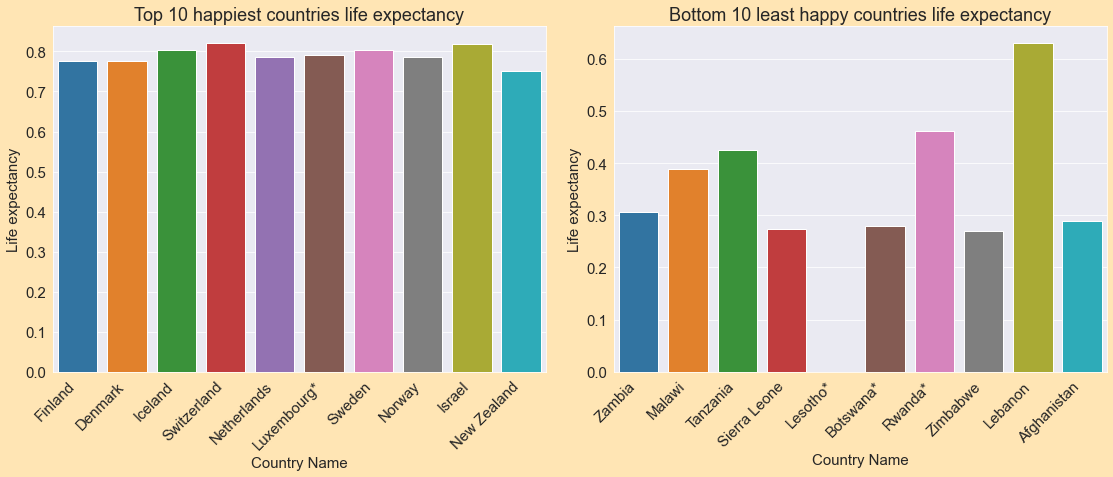

In [123]:
fig, axes =plt.subplots(1,2,figsize=(16,6))
plt.tight_layout(pad=2)

xlabels=top_10.Country
axes[0].set_title('Top 10 happiest countries life expectancy')
axes[0].set_xticklabels(xlabels,rotation=45,ha='right')
sns.barplot(x=top_10.Country,y=top_10.Healthy_life_expectancy,ax=axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('Life expectancy')

xlabels=bottom_10.Country
axes[1].set_title('Bottom 10 least happy countries life expectancy')
axes[1].set_xticklabels(xlabels,rotation=45,ha='right')
sns.barplot(x=bottom_10.Country,y=bottom_10.Healthy_life_expectancy,ax=axes[1])
axes[1].set_xlabel('Country Name')
axes[1].set_ylabel('Life expectancy')




Text(0, 0.5, 'Happiness Score')

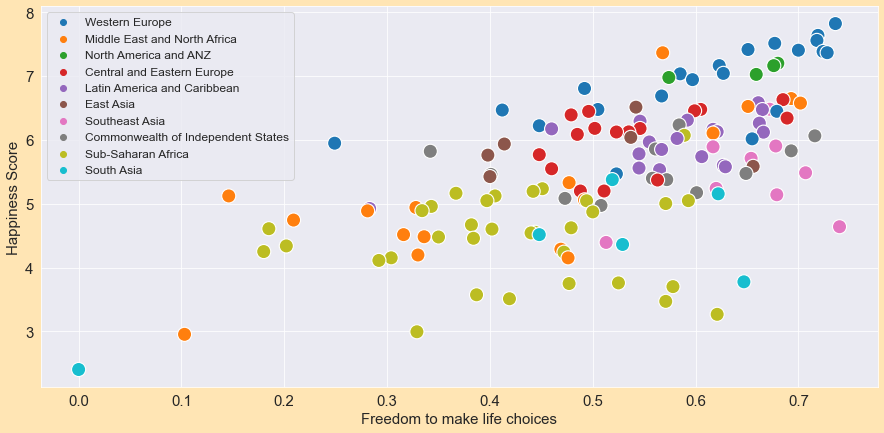

In [124]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=data.Freedom_to_make_life_choices, y=data.Happiness_score,hue=data.Regional_indicator,s=200)
plt.legend(loc='upper left',fontsize='12')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness Score')


In [133]:
# top 10 most courrupt countries

non_corrupt_countries =data.sort_values(by='Absence_of_corruption').tail(10)

In [134]:
non_corrupt_countries

,Country,Regional_indicator,Happiness_score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Absence_of_corruption
12,Ireland,Western Europe,7.041,2.129,1.166,0.779,0.627,0.190,0.408
4,Netherlands,Western Europe,7.415,1.945,1.206,0.787,0.651,0.271,0.419
3,Switzerland,Western Europe,7.512,2.026,1.226,0.822,0.677,0.147,0.461
7,Norway,Western Europe,7.365,1.997,1.239,0.786,0.728,0.217,0.474
9,New Zealand,North America and ANZ,7.200,1.852,1.235,0.752,0.680,0.245,0.483
6,Sweden,Western Europe,7.384,1.920,1.204,0.803,0.724,0.218,0.512
1,Denmark,Western Europe,7.636,1.953,1.243,0.777,0.719,0.188,0.532
0,Finland,Western Europe,7.821,1.892,1.258,0.775,0.736,0.109,0.534
139,Rwanda*,Sub-Saharan Africa,3.268,0.785,0.133,0.462,0.621,0.187,0.544
25,Singapore,Southeast Asia,6.480,2.149,1.127,0.851,0.672,0.163,0.587


<BarContainer object of 10 artists>

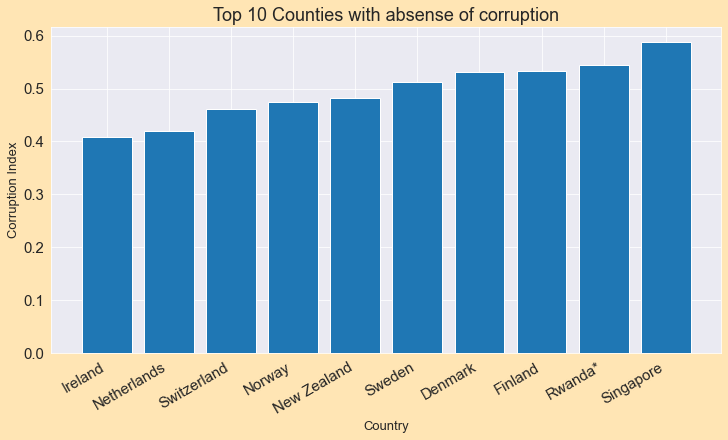

In [139]:
plt.rcParams['figure.figsize']=(12,6)
plt.title('Top 10 Counties with absense of corruption')
plt.xlabel('Country',fontsize=13)
plt.ylabel('Corruption Index',fontsize=13)
plt.xticks(rotation=30, ha='right')
plt.bar(corrupt_countries.Country, corrupt_countries.Absence_of_corruption)

Text(0, 0.5, 'Happiness Score')

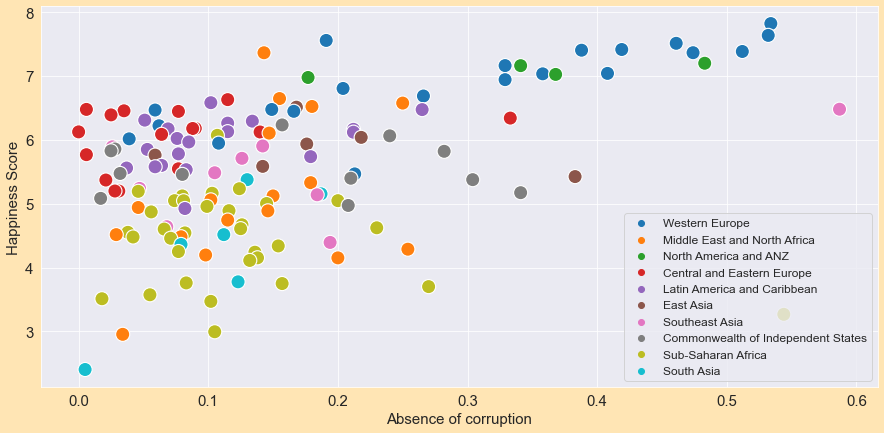

In [141]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=data.Absence_of_corruption, y=data.Happiness_score,hue=data.Regional_indicator,s=200)

plt.legend(loc='lower right',fontsize='12')
plt.xlabel('Absence of corruption')
plt.ylabel('Happiness Score')
